In [1]:
from sklearn import (datasets, manifold, mixture, metrics)
# modified sklearn _locally_linear.py line 168 to 170 added to avoid error in LLE with 'LTSA'
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from manifold_helper import fit_plot, gmm_results, ari_results
import itertools

In [2]:
n_neighbors = 30
n_components = 2
n_class = 5 # classes entre 0 e 10
colors = [list( mcolors.TABLEAU_COLORS )[i] 
          for i in range( n_class )]

In [3]:
digits = datasets.load_digits(n_class=n_class) 
data = digits.data
label = digits.target
n_samples, n_features = data.shape
print(n_samples, n_features)

901 64


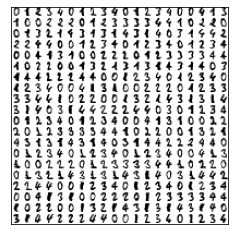

In [4]:
# plot iage of the digits
n_img_per_row = 20
img = np.zeros( (10 * n_img_per_row, 10 * n_img_per_row) )
for i in range( n_img_per_row ):
    ix = 10 * i + 1
    for j in range( n_img_per_row ):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = data[i * n_img_per_row + j].reshape( (8, 8) )
        
plt.imshow( img, cmap=plt.cm.binary )
plt.xticks( [] )
plt.yticks( [] )
plt.show()

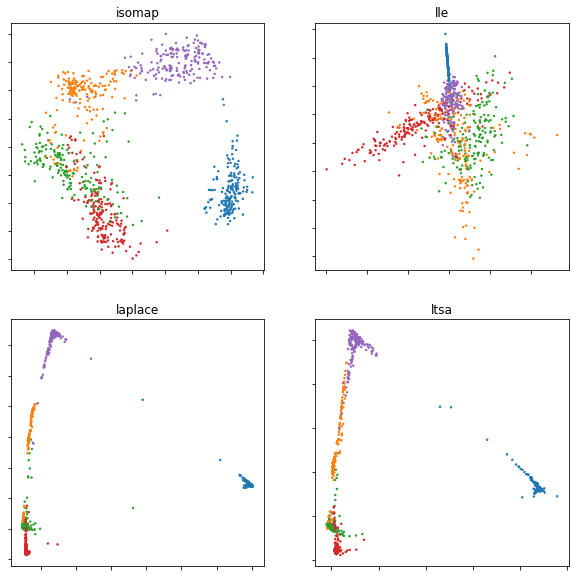

In [5]:
label_colors = [colors[v] for v in label]
y_manifold = fit_plot( data, n_neighbors, n_components, label_colors )

In [6]:
gmm = []
for i in range( 4 ):
    mm = mixture.GaussianMixture( n_components=n_class, covariance_type='full', random_state=0, n_init=50 )
    gmm.append( mm.fit( y_manifold[i] ) )

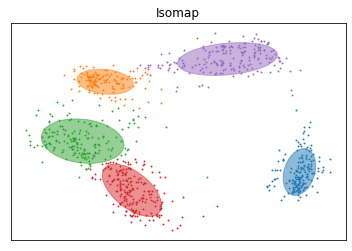

In [7]:
gmm_results( y_manifold[0], gmm[0].predict( y_manifold[0] ), gmm[0].means_, gmm[0].covariances_, 'Isomap', label_colors )

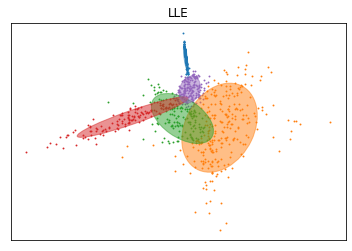

In [8]:
gmm_results( y_manifold[1], gmm[1].predict( y_manifold[1] ), gmm[1].means_, gmm[1].covariances_, 'LLE', label_colors )

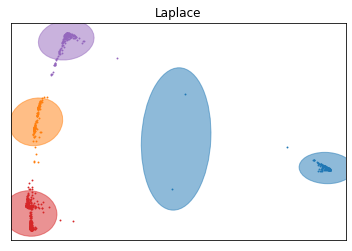

In [9]:
gmm_results( y_manifold[2], gmm[2].predict( y_manifold[2] ), gmm[2].means_, gmm[2].covariances_, 'Laplace', label_colors )

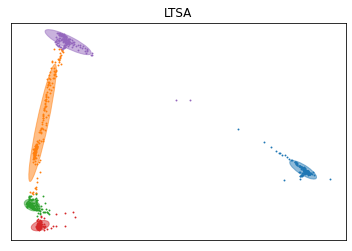

In [10]:
gmm_results( y_manifold[3], gmm[3].predict( y_manifold[3] ), gmm[3].means_, gmm[3].covariances_, 'LTSA', label_colors )

C:\Users\marco\anaconda3\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:936: LinAlgWarning: Diagonal number 282 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
C:\Users\marco\anaconda3\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:936: LinAlgWarning: Diagonal number 291 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
C:\Users\marco\anaconda3\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:936: LinAlgWarning: Diagonal number 291 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
C:\Users\marco\anaconda3\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:936: LinAlgWarning: Diagonal number 291 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
C:\Users\marco\anaconda3\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:936: LinAlgWarning: Diagonal number 291 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
C:\Users\marco\anaconda3\lib\site-packages\scipy\sparse\linalg\ei

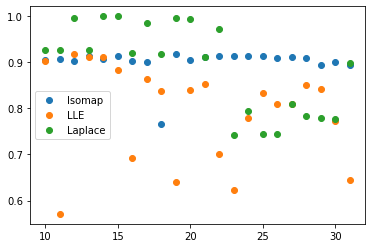

In [11]:
ari_results( data, n_class, 1, range(10, 32), label, colors )

In [12]:
predict = mixture.GaussianMixture( n_components=n_class, covariance_type='full', random_state=0 ).fit_predict(data)
metrics.adjusted_rand_score(label, predict)

0.787488766417952

In [13]:
manifold.LocallyLinearEmbedding( n_neighbors=24, n_components=n_components, method='ltsa' ).fit_transform( data )

C:\Users\marco\anaconda3\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:936: LinAlgWarning: Diagonal number 859 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)


ValueError: Error in determining null-space with ARPACK. Error message: 'ARPACK error 3: No shifts could be applied during a cycle of the Implicitly restarted Arnoldi iteration. One possibility is to increase the size of NCV relative to NEV. '. Note that eigen_solver='arpack' can fail when the weight matrix is singular or otherwise ill-behaved. In that case, eigen_solver='dense' is recommended. See online documentation for more information.